<a href="https://colab.research.google.com/github/Ian-Mutuge/ConserveAI/blob/master/Object_detection_YOLOV11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
%pip install torch torchvision torchaudio
!pip install opencv-python-headless
import matplotlib.pyplot as plt

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
import os
import cv2
import shutil
import pandas as pd
from pathlib import Path

In [ ]:
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.6MB/s]


In [ ]:
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542 (from 1)
Receiving objects: 100% (548/548), 34.16 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [ ]:
!pip3 install -r /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
!mkdir OID

In [ ]:
!mkdir OID/Dataset


In [26]:
classes = 'Weapon'
samples = 100

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv train --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.

Weapon
    [INFO] | Downloading train images.
    

In [28]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/train/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format


# Example usage
image_folder = '/content/OID/Dataset/train/Weapon/images'
label_folder = '/content/OID/Dataset/train/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)

print(f"Annotated images are saved in: {output_dir}")


Annotated images are saved in: /content/OID/Dataset/train/Weapon/annotated_images


In [27]:
classes = 'Weapon'
samples = 100

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv test --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.

Weapon
    [INFO] | Downloading test images.
    [

Annotated images are saved in: /content/OID/Dataset/test/Weapon/annotated_images


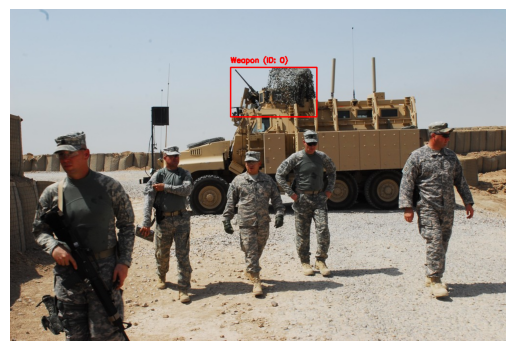

In [29]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/test/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format

    # Optionally display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes


# Example usage
image_folder = '/content/OID/Dataset/test/Weapon/images'
label_folder = '/content/OID/Dataset/test/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)
print(f"Annotated images are saved in: {output_dir}")


In [ ]:
classes = 'Weapon'
samples = 10

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv validation --limit {samples}

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Weapon.
   [ERROR] | Missing the validation-annotations-bbo

In [ ]:
# Define a mapping from class names to class IDs
class_mapping = {
    'Weapon': 0,  # Adjust based on your classes
}

# Create output directory for annotated images
output_dir = '/content/OID/Dataset/validation/Weapon/annotated_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

def display_image_with_bboxes(image_path, label_path, output_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()  # Split label by whitespace
        class_name = parts[0]  # Class name

        if class_name in class_mapping:
            class_id = class_mapping[class_name]  # Get class ID from mapping
        else:
            continue  # Skip if class name is unknown

        # Parse bounding box coordinates
        x1, y1, x2, y2 = map(float, parts[1:])  # Top-left and bottom-right coordinates

        # Draw rectangle and label
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
        label_text = f'{class_name} (ID: {class_id})'
        cv2.putText(image, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the annotated image to the specified output path
    cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save in BGR format



# Example usage
image_folder = '/content/OID/Dataset/validation/Weapon/images'
label_folder = '/content/OID/Dataset/validation/Weapon/labels'
image_files = os.listdir(image_folder)

for image_file in image_files[:2000]:  # Display and annotate first 5 images
    label_file = image_file.replace('.jpg', '.txt')  # Assuming .jpg images
    output_file = os.path.join(output_dir, image_file)  # Define output file path
    display_image_with_bboxes(os.path.join(image_folder, image_file), os.path.join(label_folder, label_file), output_file)
print(f"Annotated images are saved in: {output_dir}")


Annotated images are saved in: /content/OID/Dataset/validation/Weapon/annotated_images


In [30]:


# Path to the directory containing the label files
label_dir = '/content/OID/Dataset/train/Weapon/labels/'

# Loop through all the label files in the directory
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)

        # Read the content of the file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Rewrite the file with numeric class ID
        with open(label_path, 'w') as file:
            for line in lines:
                # Replace "Weapon" with class ID "0"
                line = line.replace('Weapon', '0')
                file.write(line)

In [31]:
label_dir = '/content/OID/Dataset/train/Weapon/labels'
image_dir = '/content/OID/Dataset/train/Weapon/images'

def normalize_labels(label_path, image_width, image_height):
    normalized_labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x, y, w, h = map(float, parts)
                if 0 <= x <= image_width and 0 <= y <= image_height:
                    # Normalize coordinates to [0, 1]
                    x, y, w, h = x / image_width, y / image_height, w / image_width, h / image_height
                    normalized_labels.append(f"{class_id} {x} {y} {w} {h}")
    return normalized_labels

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    image_path = os.path.join(image_dir, label_file.replace('.txt', '.jpg'))
    if os.path.exists(image_path):
        from PIL import Image
        with Image.open(image_path) as img:
            width, height = img.size
            normalized_labels = normalize_labels(label_path, width, height)
            if normalized_labels:
                with open(label_path, 'w') as file:
                    file.write('\n'.join(normalized_labels))

In [32]:


# Path to the directory containing the label files
label_dir = '/content/OID/Dataset/test/Weapon/labels/'

# Loop through all the label files in the directory
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)

        # Read the content of the file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Rewrite the file with numeric class ID
        with open(label_path, 'w') as file:
            for line in lines:
                # Replace "Weapon" with class ID "0"
                line = line.replace('Weapon', '0')
                file.write(line)

In [33]:
label_dir = '/content/OID/Dataset/test/Weapon/labels'
image_dir = '/content/OID/Dataset/test/Weapon/images'

def normalize_labels(label_path, image_width, image_height):
    normalized_labels = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x, y, w, h = map(float, parts)
                if 0 <= x <= image_width and 0 <= y <= image_height:
                    # Normalize coordinates to [0, 1]
                    x, y, w, h = x / image_width, y / image_height, w / image_width, h / image_height
                    normalized_labels.append(f"{class_id} {x} {y} {w} {h}")
    return normalized_labels

for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    image_path = os.path.join(image_dir, label_file.replace('.txt', '.jpg'))
    if os.path.exists(image_path):
        from PIL import Image
        with Image.open(image_path) as img:
            width, height = img.size
            normalized_labels = normalize_labels(label_path, width, height)
            if normalized_labels:
                with open(label_path, 'w') as file:
                    file.write('\n'.join(normalized_labels))

In [34]:
# Train the model
results = model.train(data="/content/weapon_dataset.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/weapon_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train22232, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/OID/Dataset/train/Weapon/labels... 10 images, 0 backgrounds, 6 corrupt: 100%|██████████| 10/10 [00:00<00:00, 817.75it/s]

train: WARNING ⚠️ /content/OID/Dataset/train/Weapon/images/00559e8576ad8108.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     420.72      239.71      840.56      478.57]
train: WARNING ⚠️ /content/OID/Dataset/train/Weapon/images/550f962114aaeb2c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     211.26      505.96      421.95      1011.8]
train: WARNING ⚠️ /content/OID/Dataset/train/Weapon/images/c679dba2c451a47e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     381.65       377.6      762.47      753.91]
train: WARNING ⚠️ /content/OID/Dataset/train/Weapon/images/eae3b39b91e9d29b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      251.4      220.06      502.01      438.95]
train: WARNING ⚠️ /content/OID/Dataset/train/Weapon/images/ed2fd17815bfb9f6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     496.35      293.17 


val: Scanning /content/OID/Dataset/test/Weapon/labels... 10 images, 0 backgrounds, 8 corrupt: 100%|██████████| 10/10 [00:00<00:00, 41775.94it/s]

val: WARNING ⚠️ /content/OID/Dataset/test/Weapon/images/0463153ffd483c48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     190.44      127.11      380.31      254.22]
val: WARNING ⚠️ /content/OID/Dataset/test/Weapon/images/24e7e4e20ecfaf97.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     463.76      252.38      927.39      504.17]
val: WARNING ⚠️ /content/OID/Dataset/test/Weapon/images/25a8e98bcd7ae58f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     475.41      286.31      950.62      571.82]
val: WARNING ⚠️ /content/OID/Dataset/test/Weapon/images/45a8fd8fbdb5be00.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     294.22      134.58      587.46      268.93]
val: WARNING ⚠️ /content/OID/Dataset/test/Weapon/images/7291eaad37e175ad.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     369.17      179.66       737.5    

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train22232
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.384      1.436       1.73         36        640: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          2          4    0.00333        0.5    0.00751    0.00288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      0.958      1.168      1.543         27        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          2          4    0.00333        0.5    0.00721    0.00289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.069      1.362      1.509         39        640: 100%|██████████| 1/1 [00:04<00:00,  4.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          2          4    0.00333        0.5    0.00694    0.00291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G       1.47      1.644      1.824         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all          2          4    0.00333        0.5    0.00731    0.00363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.191      1.395      1.556         25        640: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          2          4    0.00712       0.25     0.0308    0.00887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.189      1.427      1.604         36        640: 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4     0.0959       0.25     0.0386     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       1.11      1.213      1.593         27        640: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4      0.108       0.25     0.0445     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.169      1.354       1.58         43        640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          2          4      0.131       0.25     0.0548     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.255      1.317      1.512         42        640: 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          2          4      0.118       0.25     0.0545     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.219      1.427       1.45         21        640: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4      0.113       0.25     0.0644     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.259      1.395      1.638         21        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all          2          4     0.0525       0.25     0.0364     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.007      1.327      1.369         70        640: 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          2          4      0.035        0.5     0.0313    0.00843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.372      1.219      1.702         35        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          2          4    0.00333        0.5     0.0198    0.00528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G       1.26      1.084      1.632         31        640: 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all          2          4    0.00333        0.5     0.0115    0.00275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.439        1.4      1.844         30        640: 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          2          4    0.00333        0.5     0.0117    0.00342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.217      1.178      1.543         39        640: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          2          4    0.00333        0.5     0.0135    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.107      1.107      1.563         26        640: 100%|██████████| 1/1 [00:03<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          2          4    0.00333        0.5     0.0111    0.00363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.158      1.253      1.551         50        640: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          2          4    0.00333        0.5     0.0111    0.00363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.137      1.222      1.664         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          2          4    0.00333        0.5      0.012    0.00349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.009      1.063       1.56         27        640: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all          2          4    0.00333        0.5      0.012    0.00349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.249      1.153      1.556         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all          2          4    0.00333        0.5     0.0137    0.00402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.9992      1.138      1.535         22        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          2          4    0.00333        0.5     0.0137    0.00402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G        1.5       1.59      1.676         23        640: 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          2          4     0.0085       0.25     0.0132    0.00312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.002      1.374      1.453         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          2          4     0.0085       0.25     0.0132    0.00312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.068      1.093      1.513         39        640: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          2          4      0.132       0.25      0.052      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.318      1.392       1.72         46        640: 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all          2          4      0.132       0.25      0.052      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.249      1.195      1.541         40        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all          2          4      0.133       0.25     0.0387    0.00879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.211      1.276      1.622         31        640: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4      0.133       0.25     0.0387    0.00879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G       1.24      1.256      1.742         23        640: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          2          4     0.0802       0.25     0.0338    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.137      1.297       1.61         22        640: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4     0.0802       0.25     0.0338    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.397      1.224      1.611         39        640: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          2          4     0.0334       0.25     0.0158    0.00349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.181      1.181      1.561         35        640: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          2          4     0.0334       0.25     0.0158    0.00349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.035      1.129      1.479         36        640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          2          4    0.00333        0.5    0.00775    0.00155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.8521      1.321       1.36         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all          2          4    0.00333        0.5    0.00775    0.00155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.275      1.226      1.553         35        640: 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          2          4    0.00333        0.5    0.00665    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.127      1.206       1.59         25        640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          2          4    0.00333        0.5    0.00665    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.058      1.107      1.441         54        640: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all          2          4    0.00333        0.5    0.00779    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.246      1.344      1.539         28        640: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all          2          4    0.00333        0.5    0.00779    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.198      1.163      1.589         50        640: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4     0.0069       0.25    0.00972   0.000972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.295      1.194      1.493         53        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4     0.0069       0.25    0.00972   0.000972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.376      1.213      1.848         33        640: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4    0.00333        0.5    0.00534   0.000937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G       1.27      1.126      1.521         38        640: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          2          4    0.00333        0.5    0.00534   0.000937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.499       1.76      1.965         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          2          4      0.165       0.25     0.0823    0.00862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.205      1.175      1.521         34        640: 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          2          4      0.165       0.25     0.0823    0.00862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.9366      1.042      1.335         43        640: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          2          4     0.0148       0.25    0.00763    0.00229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.309      1.325      1.736         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          2          4     0.0148       0.25    0.00763    0.00229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.009      1.066      1.343         50        640: 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4      0.458       0.25      0.125     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.9335      1.465      1.431         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4      0.458       0.25      0.125     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.287       1.34      1.577         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all          2          4      0.466       0.25      0.123     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.388      1.297      1.848         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          2          4      0.466       0.25      0.123     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.134      1.093      1.512         30        640: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all          2          4       0.45       0.25      0.123     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.448      1.408      1.947         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          2          4       0.45       0.25      0.123     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G       1.33      1.239      1.447         40        640: 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          2          4       0.45       0.25      0.123     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.064     0.9299      1.345         36        640: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          2          4      0.554       0.25       0.25     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.005      1.048      1.386         29        640: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          2          4      0.554       0.25       0.25     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.198      1.201      1.568         40        640: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          2          4      0.554       0.25       0.25     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.146      1.179      1.564         36        640: 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          2          4    0.00167       0.25    0.00784    0.00136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.133      1.226      1.592         20        640: 100%|██████████| 1/1 [00:05<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4    0.00167       0.25    0.00784    0.00136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.402      1.604      1.697         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all          2          4    0.00167       0.25    0.00784    0.00136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      1.155      1.168      1.557         35        640: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          2          4    0.00167       0.25    0.00806   0.000806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.387      1.311      1.634         28        640: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4    0.00167       0.25    0.00806   0.000806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.327      1.251      1.493         46        640: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4    0.00167       0.25    0.00806   0.000806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.187      1.261      1.409         44        640: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          2          4    0.00333        0.5    0.00501      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.197       1.05       1.41         48        640: 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          2          4    0.00333        0.5    0.00501      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      1.214      1.284       1.59         32        640: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          2          4    0.00333        0.5    0.00501      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      1.127      1.146       1.46         37        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          2          4    0.00333        0.5    0.00835    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.155      1.069      1.542         28        640: 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          2          4    0.00333        0.5    0.00835    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G       1.37      1.315      1.847         25        640: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4    0.00333        0.5    0.00835    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.096      1.172      1.342         26        640: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          2          4    0.00333        0.5     0.0081    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G       1.04      1.195      1.391         50        640: 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          2          4    0.00333        0.5     0.0081    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      1.266      1.314      1.522         24        640: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          2          4    0.00333        0.5     0.0081    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.096      1.111      1.506         43        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all          2          4    0.00333        0.5    0.00591    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.9094     0.9753      1.365         43        640: 100%|██████████| 1/1 [00:04<00:00,  4.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all          2          4    0.00333        0.5    0.00591    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.042      1.075      1.443         49        640: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          2          4    0.00333        0.5    0.00591    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      1.122      1.098      1.461         28        640: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4    0.00333        0.5    0.00647    0.00175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      0.916     0.8931      1.253         36        640: 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          2          4    0.00333        0.5    0.00647    0.00175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      1.767      1.693      1.881         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          2          4    0.00333        0.5    0.00647    0.00175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.8959     0.9013      1.258         35        640: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all          2          4    0.00333        0.5    0.00808    0.00228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G       1.05       1.07      1.379         56        640: 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          2          4    0.00333        0.5    0.00808    0.00228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.9142     0.9976      1.317         42        640: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          2          4    0.00333        0.5    0.00808    0.00228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      1.043      1.108       1.36         53        640: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all          2          4    0.00333        0.5    0.00877    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      1.017      1.131      1.489         50        640: 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          2          4    0.00333        0.5    0.00877    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      1.037      1.084      1.409         37        640: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          2          4    0.00333        0.5    0.00877    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.9562      1.059      1.462         27        640: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all          2          4    0.00333        0.5    0.00993    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      1.179      1.013       1.45         45        640: 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          2          4    0.00333        0.5    0.00993    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.9737      1.072      1.439         26        640: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          2          4    0.00333        0.5    0.00993    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.8535      1.069      1.255         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all          2          4    0.00333        0.5    0.00993    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.9078     0.9698      1.375         31        640: 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all          2          4    0.00333        0.5     0.0163     0.0027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.9443     0.9778      1.381         52        640: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          2          4    0.00333        0.5     0.0163     0.0027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      1.074      1.225      1.341         20        640: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all          2          4    0.00333        0.5     0.0163     0.0027


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.8343      1.116      1.235         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all          2          4    0.00333        0.5     0.0163     0.0027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.6578      1.239      1.187         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all          2          4    0.00333        0.5     0.0192    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.9078       1.36      1.204         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all          2          4    0.00333        0.5     0.0192    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.8887      1.315      1.325         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          2          4    0.00333        0.5     0.0192    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      1.041      1.162      1.381         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          2          4    0.00333        0.5     0.0192    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.7688      1.102      1.227         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          2          4    0.00333        0.5      0.016    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.6818      1.001       1.26         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          2          4    0.00333        0.5      0.016    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.8124      1.053      1.249         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          2          4    0.00333        0.5      0.016    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.9013      1.295      1.349         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all          2          4    0.00333        0.5      0.016    0.00351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.7397      1.048       1.21         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all          2          4    0.00333        0.5     0.0113     0.0023



100 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/train22232/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train22232/weights/best.pt, 5.5MB

Validating runs/detect/train22232/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


                   all          2          4      0.554       0.25       0.25     0.0263
Speed: 2.1ms preprocess, 184.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train22232
